In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [87]:
#Reading the Data from csv file
df=pd.read_csv('turnover.csv.txt')

In [88]:
df.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.shape

(14999, 10)

In [5]:
df.columns

Index(['satisfaction', 'evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'churn',
       'promotion', 'department', 'salary'],
      dtype='object')

In [6]:
#checking for any null values.
df.isnull().sum()

satisfaction            0
evaluation              0
number_of_projects      0
average_montly_hours    0
time_spend_company      0
work_accident           0
churn                   0
promotion               0
department              0
salary                  0
dtype: int64

In [7]:
#checking the data types of the columns in dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14999 non-null  float64
 1   evaluation            14999 non-null  float64
 2   number_of_projects    14999 non-null  int64  
 3   average_montly_hours  14999 non-null  int64  
 4   time_spend_company    14999 non-null  int64  
 5   work_accident         14999 non-null  int64  
 6   churn                 14999 non-null  int64  
 7   promotion             14999 non-null  int64  
 8   department            14999 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [9]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [10]:
# Here salary is an ordinal category.
# department is a nominal category as it dont follow any order.

In [11]:
#Transforming the categorical values into numerical values.

In [14]:
df['salary']=df['salary'].astype('category')

In [15]:
df['salary'].dtype

CategoricalDtype(categories=['high', 'low', 'medium'], ordered=False)

In [17]:
df['salary']=df['salary'].cat.reorder_categories(['low','medium','high'])

In [19]:
df['salary']=df['salary'].cat.codes

In [20]:
df['salary'].unique()

array([0, 1, 2], dtype=int8)

In [21]:
# since departments in a nominal value we use pandas dummy variables and one hot encode the department.
department=pd.get_dummies(df.department)
department.shape

(14999, 10)

In [22]:
department.head()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [23]:
department['marketing'].value_counts()

0    14141
1      858
Name: marketing, dtype: int64

In [24]:
#dropping the accounting column to avoid dummy trap
department.drop('accounting',axis=1,inplace=True)
department.shape

(14999, 9)

In [25]:
#dropping the original department column from the initial dataset
df.drop('department',axis=1,inplace=True)
df.shape

(14999, 9)

In [26]:
df2=df.join(department)

In [27]:
df2.shape

(14999, 18)

In [30]:
df2.columns

Index(['satisfaction', 'evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'churn',
       'promotion', 'salary', 'IT', 'RandD', 'hr', 'management', 'marketing',
       'product_mng', 'sales', 'support', 'technical'],
      dtype='object')

In [31]:
df2['churn'].value_counts()

0    11428
1     3571
Name: churn, dtype: int64

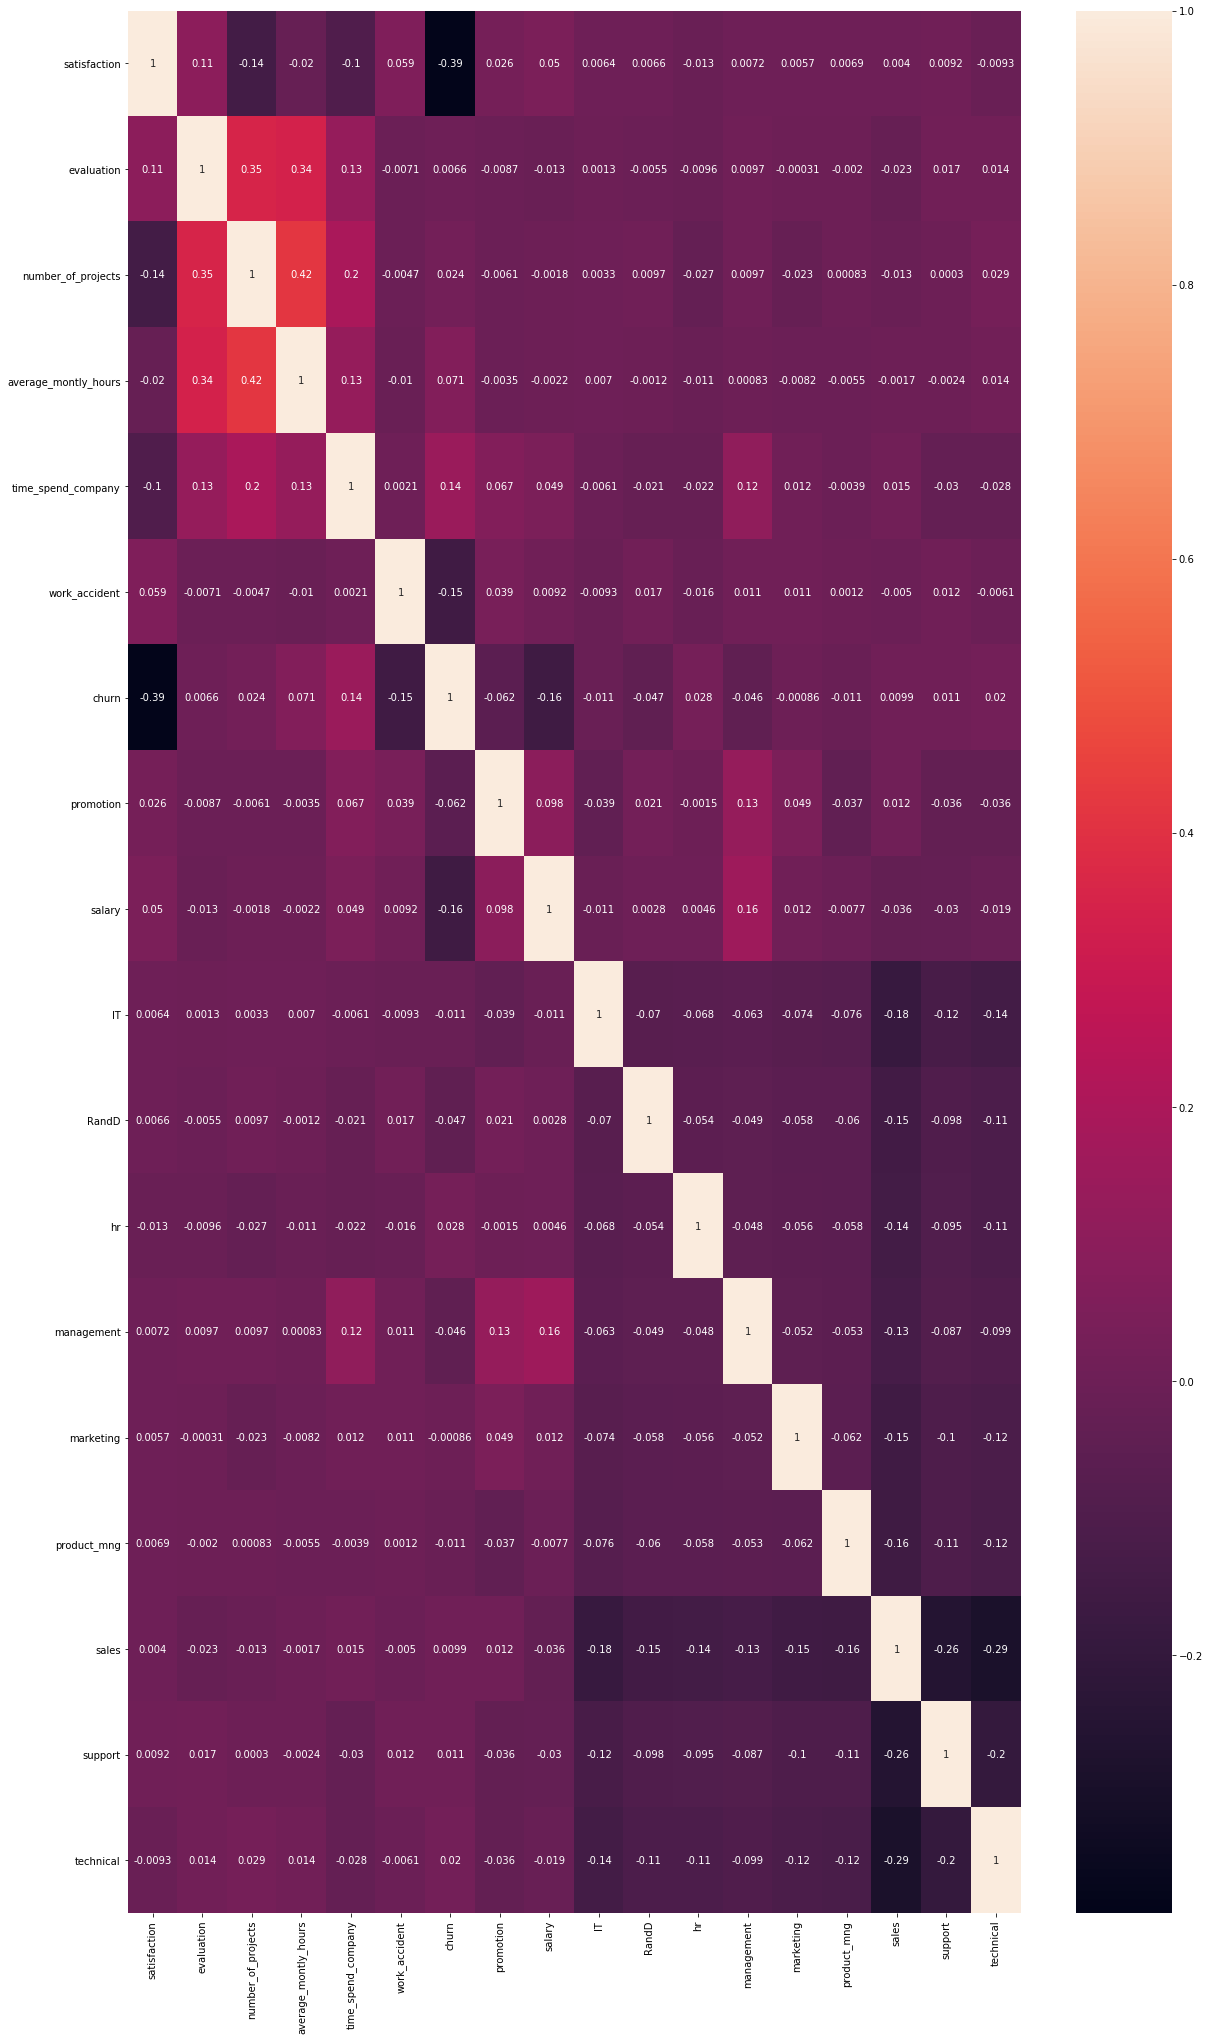

In [38]:
#plotting the corelation matrix to see how the target and independent variables are corerlated

fig, ax = plt.subplots(figsize=(20,35))  
corr_matrix=df2.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [39]:
# the correlation matrix shows a negative corerelation between satisfaction and churn which means if the employee is happy he will not leave the company.

In [44]:
target=df2['churn']
features=df2.drop('churn',axis=1)
features.shape

(14999, 17)

In [45]:
target.shape

(14999,)

In [50]:
#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

In [51]:
X_train.shape

(11249, 17)

In [52]:
X_test.shape

(3750, 17)

In [54]:
#predicting churn using the decison tree classifier.
clf=DecisionTreeClassifier(random_state=42)

In [55]:
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [56]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [61]:
ypred=clf.predict(X_test)
ypred.shape

(3750,)

In [62]:
y_test.shape

(3750,)

In [65]:
clf.score(X_test,y_test)

0.9722666666666666

In [73]:
# adjusting the tree depth

In [75]:
#deducing the depth of the tree to avoid overfitting
clf2=DecisionTreeClassifier(max_depth=5,random_state=42)

In [76]:
clf2

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [77]:
clf2.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [78]:
clf2.score(X_train,y_train)
clf2.score(X_test,y_test)

0.9706666666666667

In [79]:
clf3=DecisionTreeClassifier(min_samples_leaf=100,random_state=42)
clf3.fit(X_train,y_train)
clf3.score(X_train,y_train)
clf3.score(X_test,y_test)

0.9613333333333334

In [80]:
#EValuating the Model Performance

In [85]:
ypred=clf.predict(X_test)
precision_score(y_test,ypred)

0.9240641711229947

In [90]:
recall_score(y_test,ypred)

0.9632107023411371

In [92]:
roc_auc_score(ypred,y_test)

0.9561706290783711

In [93]:
# clas imbalanced bisaing the prediction towards majority class.

In [94]:
clf4=DecisionTreeClassifier(max_depth=5,class_weight="balanced",random_state=42)
clf4.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [95]:
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

1.0
0.9722666666666666


In [96]:
#hyper parameter tuning

In [99]:
print(cross_val_score(clf,features,target,cv=10))

[0.98533333 0.98533333 0.974      0.96533333 0.96       0.97933333
 0.99       0.99333333 1.         1.        ]


In [101]:
# Generate values for maximum depth
depth = [i for i in range(5,21,1)]

# Generate values for minimum sample size
samples = [i for i in range(50,500,50)]

# Create the dictionary with parameters to be checked
parameters = dict(max_depth=depth, min_samples_leaf=samples)

In [103]:
parameters = dict(max_depth=depth, min_samples_leaf=samples)

In [106]:
param_search = GridSearchCV(clf, parameters)

# fit the param_search to the training dataset
param_search.fit(X_train,y_train)

# print the best parameters found
print(param_search.best_params_)

{'max_depth': 5, 'min_samples_leaf': 50}


In [107]:
#feature importance for predicting attrition

In [111]:
feature_importance=param_search.best_estimator_.feature_importances_

In [112]:
feature_list = list(features)

In [114]:
relative_importances = pd.DataFrame(index=feature_list, data=feature_importance, columns=["importance"])

In [115]:
relative_importances.sort_values(by="importance", ascending=False)

,importance
satisfaction,0.551529
time_spend_company,0.157009
evaluation,0.144354
number_of_projects,0.092864
average_montly_hours,0.053087
technical,0.000631
hr,0.000295
salary,0.000231
promotion,0.000000
work_accident,0.000000


In [119]:
selected_features=relative_importances[relative_importances.importance>0.01]

In [120]:
selectedlist=selected_features.index

In [121]:
X_train_selected=X_train[selectedlist]
X_test_selected=X_test[selectedlist]

In [122]:
clf_best=DecisionTreeClassifier(max_depth=8,min_samples_leaf=150,class_weight='balanced',random_state=42)

In [123]:
clf_best.fit(X_train_selected,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=150, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [124]:
bestpred=clf_best.predict(X_test_selected)

In [125]:
print(recall_score(y_test, bestpred) * 100)

91.75027870680044


In [126]:
print(roc_auc_score(y_test, bestpred) * 100)

94.07002193314084
